In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import scipy
from scipy import stats
import glob, os

In [2]:
## Customizing plot
commonFontsize=8
def config_rcparams():
    plt.rcParams['font.family'] = ['sans-serif']
    plt.rcParams['font.sans-serif'] = ['arial']
    plt.rcParams['font.size'] = commonFontsize
    plt.rcParams['axes.labelsize'] = commonFontsize
    plt.rcParams['xtick.labelsize'] = commonFontsize
    plt.rcParams['ytick.labelsize'] = commonFontsize
    plt.rcParams['axes.titlesize'] = commonFontsize
    plt.rcParams['svg.fonttype'] = 'none'
    plt.rcParams['mathtext.fontset'] = 'custom'
    plt.rcParams['mathtext.cal'] = 'arial'
    plt.rcParams['mathtext.rm'] = 'arial'
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams['ytick.color'] = 'black'
    plt.rcParams['axes.linewidth'] = 0.7
    plt.rcParams['xtick.major.width'] = 0.7
    plt.rcParams['ytick.major.width'] = 0.7
    plt.rcParams['xtick.major.size' ] = 3
    plt.rcParams['ytick.major.size' ] = 3
    plt.rcParams['text.usetex' ] = False
config_rcparams()

## Epithelial and mesenchymal plot analysis

In [3]:
## reading the file name
os.chdir("data/r_output/")
tumor_tissues=[]
for  i in glob.glob("GSVA_epithelial_mesenchymal_score_*.tsv"):
    tumor_tissues.append(i)

In [4]:
input_path2="data/r_output/"
input_path1="data/tcga_tumor/"

mes_immuno_corr=[]
epi_immuno_corr=[]
mes_immuno_p_value=[]
epi_immuno_p_value=[]

mes_const_corr=[]
epi_const_corr=[]
mes_const_p_value=[]
epi_const_p_value=[]

tumor_tissue1=[]

for i in range(33):
    Epithelial_mesenchymal_score=pd.read_csv(input_path2+tumor_tissues[i],sep="\t")
    tumor_tissue1.append(tumor_tissues[i].split('_')[4].split('.')[0])
    
    gene_data_frame=pd.read_csv(input_path1+tumor_tissues[i].split('_')[4],index_col='Hybridization REF',sep='\t')
    gene_data_frame.columns=gene_data_frame.columns.str.split('-').str[0:3].str.join('.')
    gene_data_frame=(gene_data_frame+0.01).T

    log_gene_data_frame=np.log2(gene_data_frame[['PSMB5','PSMB6','PSMB7','PSMB8','PSMB9','PSMB10']])
    log_gene_data_frame['constitutive_proteosome']=(1/3)*(log_gene_data_frame['PSMB5']+log_gene_data_frame['PSMB6']+log_gene_data_frame['PSMB7'])
    log_gene_data_frame['immuno_proteosome']=(1/3)*(log_gene_data_frame['PSMB8']+log_gene_data_frame['PSMB9']+log_gene_data_frame['PSMB10'])
     
    df_tmp_ep_mes_proteasomes=pd.merge(log_gene_data_frame,Epithelial_mesenchymal_score.T,left_index=True, right_index=True)
    df_tmp_ep_mes_proteasomes_1=df_tmp_ep_mes_proteasomes[['immuno_proteosome','constitutive_proteosome','Mesenchymal_genes','Epithelial_genes']]
    
    
    correlation, p_value = stats.stats.pearsonr(df_tmp_ep_mes_proteasomes_1['constitutive_proteosome'], df_tmp_ep_mes_proteasomes_1['Mesenchymal_genes'])
    mes_const_corr.append(correlation)
    mes_const_p_value.append(p_value)
    correlation, p_value = stats.stats.pearsonr(df_tmp_ep_mes_proteasomes_1['constitutive_proteosome'], df_tmp_ep_mes_proteasomes_1['Epithelial_genes'])
    epi_const_corr.append(correlation)
    epi_const_p_value.append(p_value) 
    
    correlation, p_value = stats.stats.pearsonr(df_tmp_ep_mes_proteasomes_1['immuno_proteosome'], df_tmp_ep_mes_proteasomes_1['Mesenchymal_genes'])
    mes_immuno_corr.append(correlation)
    mes_immuno_p_value.append(p_value)
    correlation, p_value = stats.stats.pearsonr(df_tmp_ep_mes_proteasomes_1['immuno_proteosome'], df_tmp_ep_mes_proteasomes_1['Epithelial_genes'])
    epi_immuno_corr.append(correlation)
    epi_immuno_p_value.append(p_value)

In [5]:
df_mes_epi_immuno=pd.DataFrame()
df_mes_epi_immuno['mes_immuno_corr']=mes_immuno_corr
df_mes_epi_immuno['mes_immuno_p_value']=mes_immuno_p_value
df_mes_epi_immuno['epi_immuno_corr']=epi_immuno_corr
df_mes_epi_immuno['epi_immuno_p_value']=epi_immuno_p_value
df_mes_epi_immuno.index=tumor_tissue1

df_mes_epi_const=pd.DataFrame()
df_mes_epi_const['mes_const_corr']=mes_const_corr
df_mes_epi_const['mes_const_p_value']=mes_const_p_value
df_mes_epi_const['epi_const_corr']=epi_const_corr
df_mes_epi_const['epi_const_p_value']=epi_const_p_value
df_mes_epi_const.index=tumor_tissue1

df_mes_epi_const_1=df_mes_epi_const[(df_mes_epi_const['mes_const_p_value']<0.05)&(df_mes_epi_const['epi_const_p_value']<0.05)]
df_mes_epi_immuno_1=df_mes_epi_immuno[(df_mes_epi_immuno['mes_immuno_p_value']<0.05)&(df_mes_epi_immuno['epi_immuno_p_value']<0.05)]

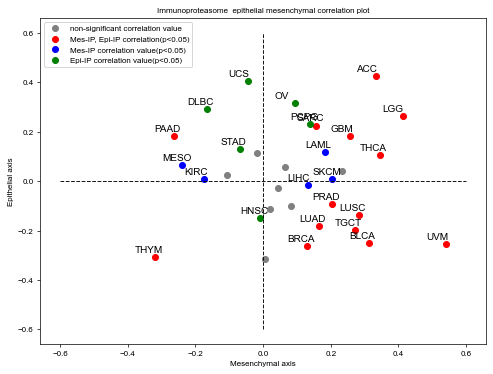

In [6]:

df_mes_epi_immuno_tmp=df_mes_epi_immuno[(df_mes_epi_immuno['mes_immuno_p_value']>0.05)&(df_mes_epi_immuno['epi_immuno_p_value']>0.05)]
df_mes_epi_immuno_tmp2=df_mes_epi_immuno[(df_mes_epi_immuno['mes_immuno_p_value']<0.05)&(df_mes_epi_immuno['epi_immuno_p_value']<0.05)]
df_mes_epi_immuno_tmp3=df_mes_epi_immuno[(df_mes_epi_immuno['mes_immuno_p_value']<0.05)&(df_mes_epi_immuno['epi_immuno_p_value']>0.05)]
df_mes_epi_immuno_tmp4=df_mes_epi_immuno[(df_mes_epi_immuno['mes_immuno_p_value']>0.05)&(df_mes_epi_immuno['epi_immuno_p_value']<0.05)]



fig, ax = plt.subplots(figsize=(8,6))
ax.plot(df_mes_epi_immuno_tmp['mes_immuno_corr'],df_mes_epi_immuno_tmp['epi_immuno_corr'],'o',label="non-significant correlation value",color='grey')
ax.plot(df_mes_epi_immuno_tmp2['mes_immuno_corr'],df_mes_epi_immuno_tmp2['epi_immuno_corr'],'o',label="Mes-IP, Epi-IP correlation(p<0.05)",color='red')
ax.plot(df_mes_epi_immuno_tmp3['mes_immuno_corr'],df_mes_epi_immuno_tmp3['epi_immuno_corr'],'o',label="Mes-IP correlation value(p<0.05)",color='blue')
ax.plot(df_mes_epi_immuno_tmp4['mes_immuno_corr'],df_mes_epi_immuno_tmp4['epi_immuno_corr'],'o',label="Epi-IP correlation value(p<0.05)",color='green')

plt.xlabel('Mesenchymal axis')
plt.ylabel('Epithelial axis')
plt.title('Immunoproteasome  epithelial mesenchymal correlation plot')
ax.plot([-0.6, 0.6], [0, 0], linewidth=1,color='black',alpha=0.9,linestyle="dashed")
ax.plot([0, 0], [-0.6, 0.6], linewidth=1,color='black',alpha=0.9,linestyle="dashed")
ax.legend(loc="upper left")

x=df_mes_epi_immuno_tmp2['mes_immuno_corr']
y=df_mes_epi_immuno_tmp2['epi_immuno_corr']
labels=list(df_mes_epi_immuno_tmp2.index)
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label, fontsize=10,            # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(-20, 7),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered

x=df_mes_epi_immuno_tmp3['mes_immuno_corr']
y=df_mes_epi_immuno_tmp3['epi_immuno_corr']
labels=list(df_mes_epi_immuno_tmp3.index)
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label, fontsize=10,            # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(-20, 7),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered

x=df_mes_epi_immuno_tmp4['mes_immuno_corr']
y=df_mes_epi_immuno_tmp4['epi_immuno_corr']
labels=list(df_mes_epi_immuno_tmp4.index)
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label, fontsize=10,            # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(-20, 7),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered


#plt.savefig("plots/"+'Immuno_epith_mesench_corr_v1'+'.svg',bbox_inches = "tight",dpi=500)
plt.show()

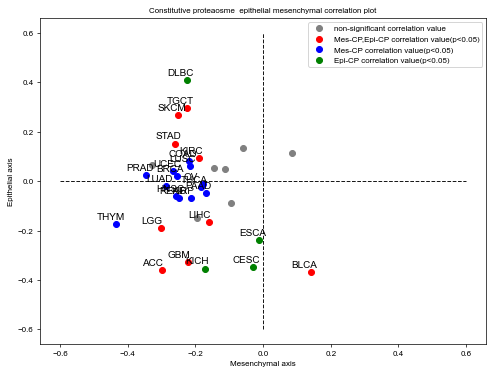

In [7]:
df_mes_epi_const_tmp=df_mes_epi_const[(df_mes_epi_const['mes_const_p_value']>0.05)&(df_mes_epi_const['epi_const_p_value']>0.05)]
df_mes_epi_const_tmp2=df_mes_epi_const[(df_mes_epi_const['mes_const_p_value']<0.05)&(df_mes_epi_const['epi_const_p_value']<0.05)]
df_mes_epi_const_tmp3=df_mes_epi_const[(df_mes_epi_const['mes_const_p_value']<0.05)&(df_mes_epi_const['epi_const_p_value']>0.05)]
df_mes_epi_const_tmp4=df_mes_epi_const[(df_mes_epi_const['mes_const_p_value']>0.05)&(df_mes_epi_const['epi_const_p_value']<0.05)]

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(df_mes_epi_const_tmp['mes_const_corr'],df_mes_epi_const_tmp['epi_const_corr'],'o',label="non-significant correlation value",color='grey')
ax.plot(df_mes_epi_const_tmp2['mes_const_corr'],df_mes_epi_const_tmp2['epi_const_corr'],'o',label="Mes-CP,Epi-CP correlation value(p<0.05)",color='red')
ax.plot(df_mes_epi_const_tmp3['mes_const_corr'],df_mes_epi_const_tmp3['epi_const_corr'],'o',label="Mes-CP correlation value(p<0.05)",color='blue')
ax.plot(df_mes_epi_const_tmp4['mes_const_corr'],df_mes_epi_const_tmp4['epi_const_corr'],'o',label="Epi-CP correlation value(p<0.05)",color='green')

plt.xlabel('Mesenchymal axis')
plt.ylabel('Epithelial axis')
plt.title('Constitutive proteaosme  epithelial mesenchymal correlation plot')
ax.plot([-0.6, 0.6], [0, 0], linewidth=1,color='black',alpha=0.9,linestyle="dashed")
ax.plot([0, 0], [-0.6, 0.6], linewidth=1,color='black',alpha=0.9,linestyle="dashed")
ax.legend(loc="upper right")

x=df_mes_epi_const_tmp2['mes_const_corr']
y=df_mes_epi_const_tmp2['epi_const_corr']
labels=list(df_mes_epi_const_tmp2.index)
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label, fontsize=10,            # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(-20, 7),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
    
x=df_mes_epi_const_tmp3['mes_const_corr']
y=df_mes_epi_const_tmp3['epi_const_corr']
labels=list(df_mes_epi_const_tmp3.index)
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label, fontsize=10,            # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(-20, 7),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered

x=df_mes_epi_const_tmp4['mes_const_corr']
y=df_mes_epi_const_tmp4['epi_const_corr']
labels=list(df_mes_epi_const_tmp4.index)
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label, fontsize=10,            # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(-20, 7),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered

#plt.savefig("plots/"+'Const_epith_mesench_corr_v1'+'.svg',bbox_inches = "tight",dpi=500)
plt.show()